In [2292]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn 

In [2293]:
data = pd.read_csv('./dataset.csv')
data.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [2294]:
data.rename(columns={
    'CBD_DIST': 'BUSINESS_DIST', 
    'NEAREST_STN_DIST': 'TRAIN_STATION_DIST', 
    'NEAREST_SCH_DIST': 'SCHOOL_DIST',
    'NEAREST_SCH_RANK': 'SCHOOL_RANK',
}, inplace=True)

In [2295]:
data = data.drop(['ADDRESS', 'SUBURB', 'NEAREST_SCH', 'NEAREST_STN'], axis=1)

## Preprocessing

In [2296]:
print('MISSIN VALUES :\n')
print(data.isnull().sum())

MISSIN VALUES :

PRICE                     0
BEDROOMS                  0
BATHROOMS                 0
GARAGE                 2478
LAND_AREA                 0
FLOOR_AREA                0
BUILD_YEAR             3155
BUSINESS_DIST             0
TRAIN_STATION_DIST        0
DATE_SOLD                 0
POSTCODE                  0
LATITUDE                  0
LONGITUDE                 0
SCHOOL_DIST               0
SCHOOL_RANK           10952
dtype: int64


In [2297]:
data['GARAGE'] = data['GARAGE'].fillna(0)
data['BUILD_YEAR'] = data['BUILD_YEAR'].fillna(data['BUILD_YEAR'].mean())

In [2298]:
### Filling missing nearest school rank

In [2299]:
school = data.drop(['DATE_SOLD', 'BUILD_YEAR'], axis=1)
school_nona = school.dropna(axis=0)
school_predict = school[school['SCHOOL_RANK'].isna()]

In [2300]:
X = school_nona.drop('SCHOOL_RANK', axis=1)
y = school_nona['SCHOOL_RANK']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [2301]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
RFR.score(X_test,y_test)

0.9731501385577729

In [2302]:
X_pred = school_predict.drop("SCHOOL_RANK", axis=1)
school_predict.drop("SCHOOL_RANK", axis=1)
school_predict["SCHOOL_RANK"] = RFR.predict(X_pred)
data['SCHOOL_RANK'].fillna(school_predict["SCHOOL_RANK"], inplace=True)

/tmp/ipykernel_3092/1679750832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_predict["SCHOOL_RANK"] = RFR.predict(X_pred)


In [2303]:
from datetime import date

def age(buid_year):
    current_year = date.today().year
    return current_year - buid_year

In [2304]:
date_sold = pd.to_datetime(data['DATE_SOLD'])
data['YEAR_SOLD'] = date_sold.apply(lambda x: x.year)
data['AGE'] = data['BUILD_YEAR'].apply(age)
data.drop(['BUILD_YEAR', 'DATE_SOLD'], axis=1, inplace=True)

In [2305]:
data.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUSINESS_DIST,TRAIN_STATION_DIST,POSTCODE,LATITUDE,LONGITUDE,SCHOOL_DIST,SCHOOL_RANK,YEAR_SOLD,AGE
0,565000,4,2,2.0,600,160,18300,1800,6164,-32.115900,115.842450,0.828339,69.15,2018,19.0
1,365000,3,2,2.0,351,139,26900,4900,6167,-32.193470,115.859554,5.524324,129.00,2019,9.0
2,287000,3,1,1.0,719,86,22600,1900,6111,-32.120578,115.993579,1.649178,113.00,2015,43.0
3,255000,2,1,2.0,651,59,17900,3600,6056,-31.900547,116.038009,1.571401,70.99,2018,69.0
4,325000,4,1,2.0,466,131,11200,2000,6054,-31.885790,115.947780,1.514922,117.00,2016,24.0


## Visualisation

/tmp/ipykernel_3092/380613321.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data.corr(), dtype=np.bool)


<AxesSubplot: title={'center': 'Pearson Correlation Matrix'}>

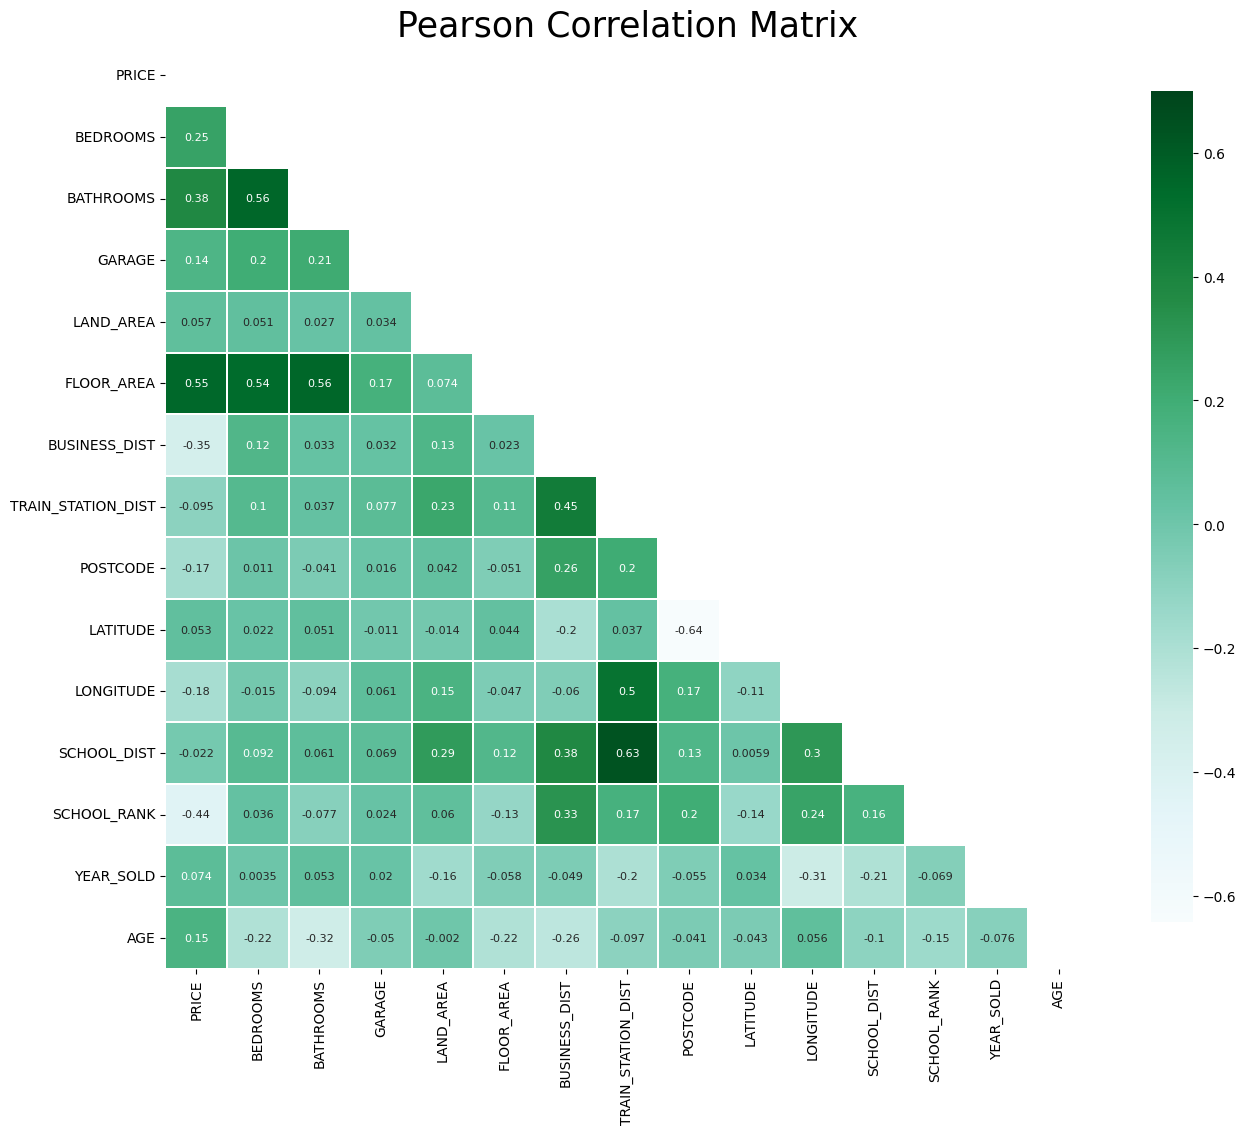

In [2306]:
mask = np.zeros_like(data.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

seaborn.heatmap(data.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9})

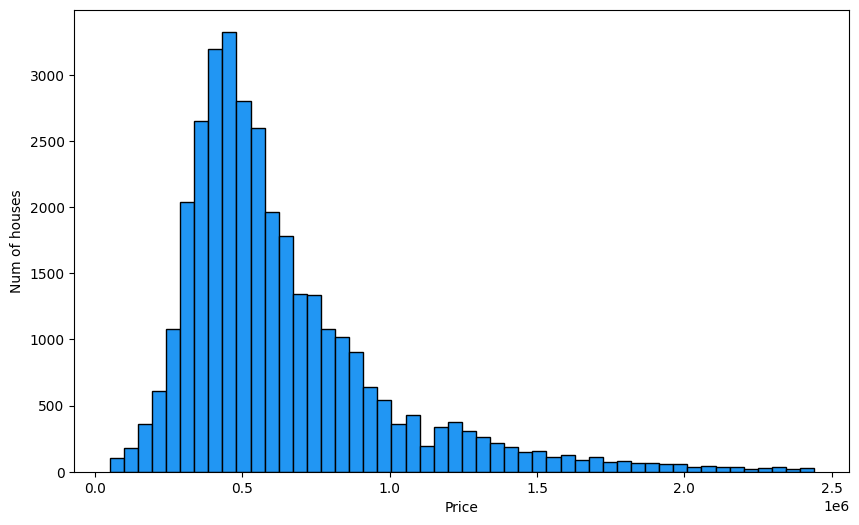

In [2307]:
plt.figure(figsize=(10, 6))
plt.hist(data['PRICE'], bins=50, ec='black', color='#2196f3')
plt.xlabel("Price")
plt.ylabel("Num of houses")
plt.show()

<AxesSubplot: xlabel='BATHROOMS', ylabel='PRICE'>

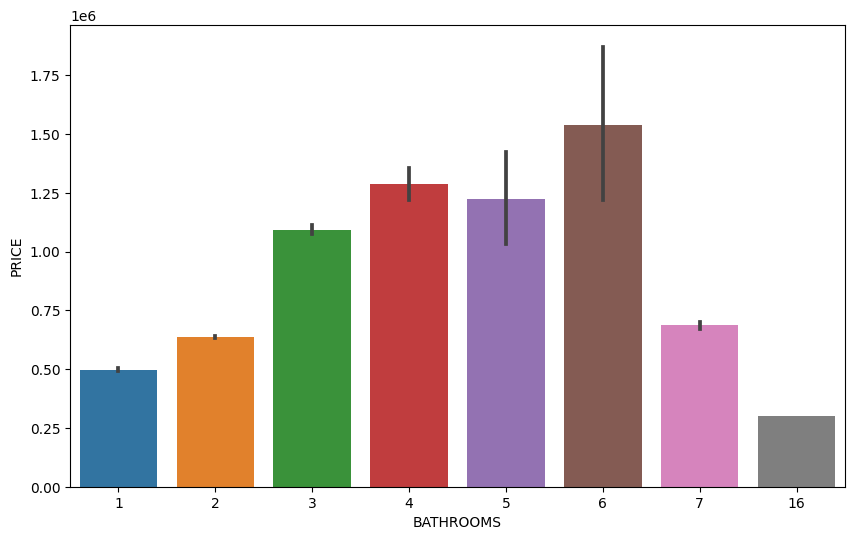

In [2308]:
plt.figure(figsize=(10,6))
seaborn.barplot(x=data['BATHROOMS'], y=data['PRICE'])

<AxesSubplot: ylabel='AGE'>

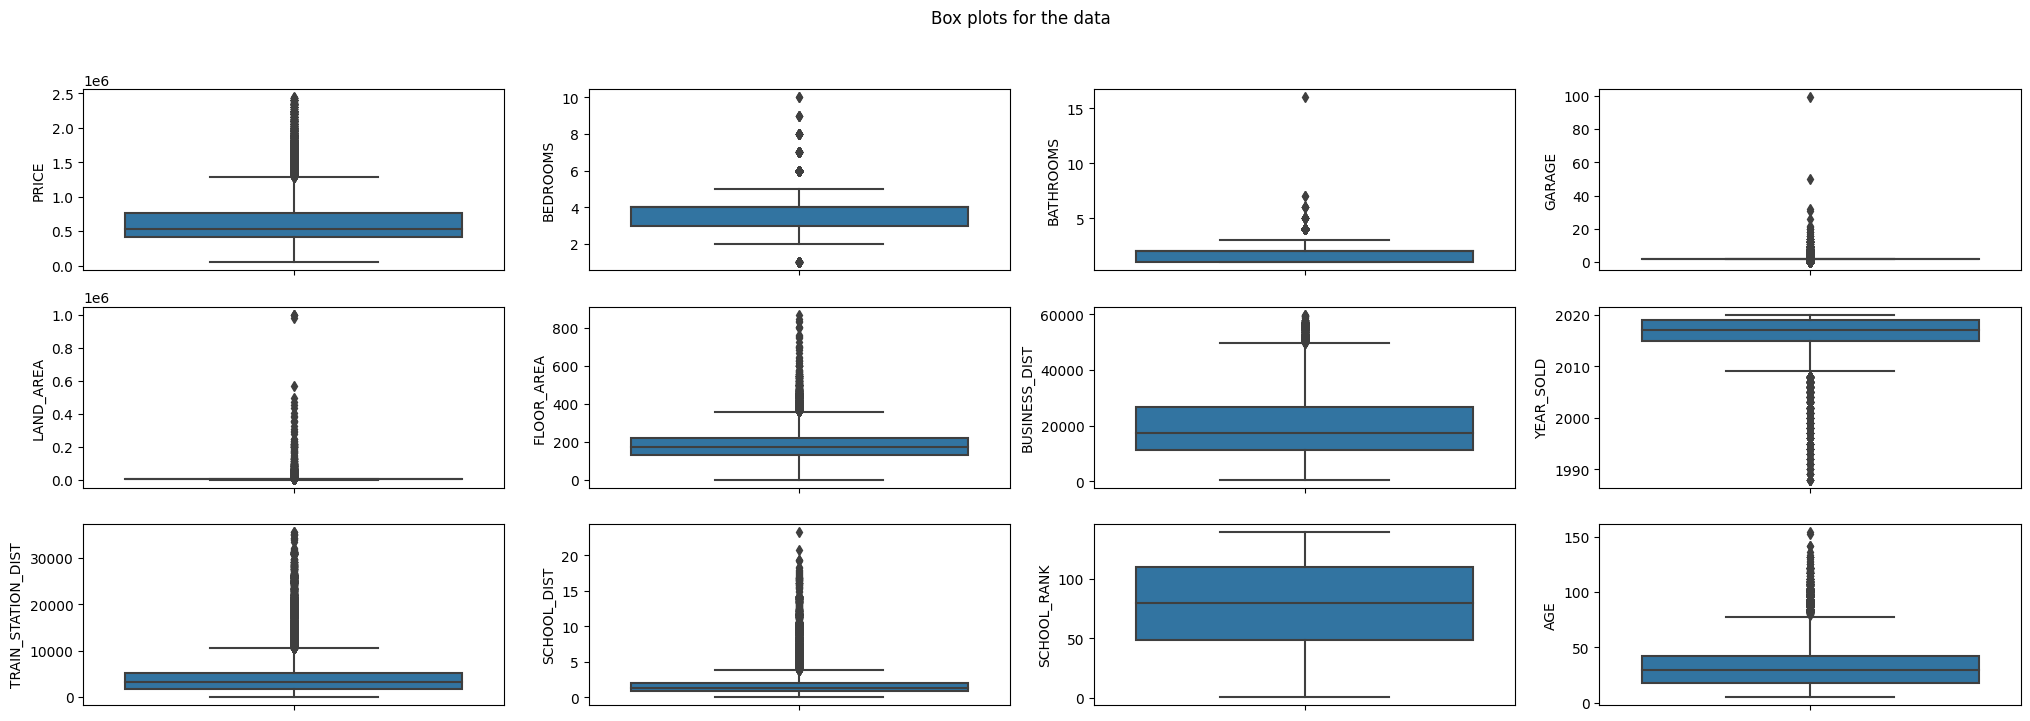

In [2309]:
fig, axes = plt.subplots(3, 4, figsize=(25, 8))

fig.suptitle('Box plots for the data')
seaborn.boxplot(ax=axes[0, 0], data=data, y='PRICE')
seaborn.boxplot(ax=axes[0, 1], data=data, y='BEDROOMS')
seaborn.boxplot(ax=axes[0, 2], data=data, y='BATHROOMS')
seaborn.boxplot(ax=axes[0, 3], data=data, y='GARAGE')
seaborn.boxplot(ax=axes[1, 0], data=data, y='LAND_AREA')
seaborn.boxplot(ax=axes[1, 1], data=data, y='FLOOR_AREA')
seaborn.boxplot(ax=axes[1, 2], data=data, y='BUSINESS_DIST')
seaborn.boxplot(ax=axes[1, 3], data=data, y='YEAR_SOLD')
seaborn.boxplot(ax=axes[2, 0], data=data, y='TRAIN_STATION_DIST')
seaborn.boxplot(ax=axes[2, 1], data=data, y='SCHOOL_DIST')
seaborn.boxplot(ax=axes[2, 2], data=data, y='SCHOOL_RANK')
seaborn.boxplot(ax=axes[2, 3], data=data, y='AGE')

## Outliers detection

In [2310]:
data.describe(percentiles=[.01, .02, .03, .05, .1, .5, .9, .92, .93, .99, .999])

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUSINESS_DIST,TRAIN_STATION_DIST,POSTCODE,LATITUDE,LONGITUDE,SCHOOL_DIST,SCHOOL_RANK,YEAR_SOLD,AGE
count,3.365600e+04,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000
mean,6.370720e+05,3.659110,1.823063,2.037943,2740.644016,183.501545,19777.374465,4523.371494,6089.420074,-31.960664,115.879265,1.815268,78.625504,2016.621019,32.293564
std,3.558256e+05,0.752038,0.587427,1.434123,16693.513215,72.102982,11364.415413,4495.064024,62.167921,0.177780,0.118137,1.746000,38.219385,3.505477,19.957499
min,5.100000e+04,1.000000,1.000000,0.000000,61.000000,1.000000,681.000000,46.000000,6003.000000,-32.472979,115.582730,0.070912,1.000000,1988.000000,5.000000
1%,1.560000e+05,2.000000,1.000000,0.000000,200.000000,75.000000,3200.000000,292.000000,6008.000000,-32.412280,115.685144,0.236518,4.000000,2002.000000,7.000000
2%,1.970500e+05,2.000000,1.000000,0.000000,225.000000,83.000000,3800.000000,387.000000,6009.000000,-32.362467,115.700704,0.288515,7.000000,2006.000000,7.000000
3%,2.250000e+05,2.000000,1.000000,0.000000,250.000000,87.000000,4200.000000,471.000000,6010.000000,-32.339354,115.709031,0.336230,8.000000,2008.000000,8.000000
5%,2.650000e+05,3.000000,1.000000,0.000000,296.000000,93.000000,5000.000000,604.750000,6016.000000,-32.295105,115.723654,0.412193,13.000000,2011.000000,9.000000
10%,3.150000e+05,3.000000,1.000000,1.000000,363.000000,104.000000,7100.000000,902.000000,6021.000000,-32.222317,115.750880,0.557933,23.000000,2013.000000,11.000000
50%,5.355000e+05,4.000000,2.000000,2.000000,682.000000,172.000000,17500.000000,3200.000000,6069.000000,-31.933231,115.854198,1.345520,80.040000,2017.000000,29.000000


In [2311]:
from scipy import stats
stats.zscore(data).describe(percentiles=[0.01, 0.02, 0.03,0.05,0.95,0.97,0.98,0.99]).round(5)

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUSINESS_DIST,TRAIN_STATION_DIST,POSTCODE,LATITUDE,LONGITUDE,SCHOOL_DIST,SCHOOL_RANK,YEAR_SOLD,AGE
count,33656.00000,33656.00000,33656.00000,33656.00000,33656.00000,33656.00000,33656.00000,33656.00000,33656.00000,33656.00000,33656.00000,33656.00000,33656.00000,33656.00000,33656.00000
mean,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000
std,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001
min,-1.64710,-3.53592,-1.40115,-1.42106,-0.16052,-2.53116,-1.68039,-0.99608,-1.39013,-2.88178,-2.51014,-0.99907,-2.03108,-8.16478,-1.36760
1%,-1.35201,-2.20618,-1.40115,-1.42106,-0.15220,-1.50484,-1.45873,-0.94135,-1.30970,-2.54035,-1.64322,-0.90422,-1.95259,-4.17097,-1.26739
2%,-1.23664,-2.20618,-1.40115,-1.42106,-0.15070,-1.39388,-1.40593,-0.92022,-1.29361,-2.26016,-1.51150,-0.87444,-1.87409,-3.02988,-1.26739
3%,-1.15809,-2.20618,-1.40115,-1.42106,-0.14920,-1.33840,-1.37074,-0.90153,-1.27753,-2.13014,-1.44101,-0.84711,-1.84792,-2.45934,-1.21728
5%,-1.04567,-0.87644,-1.40115,-1.42106,-0.14644,-1.25519,-1.30034,-0.87177,-1.18101,-1.88124,-1.31723,-0.80361,-1.71710,-1.60352,-1.16718
50%,-0.28546,0.45330,0.30121,-0.02646,-0.12332,-0.15952,-0.20040,-0.29441,-0.32847,0.15431,-0.21219,-0.26905,0.03701,0.10811,-0.16503
95%,2.07388,1.78303,2.00358,1.36814,0.55929,1.78565,1.93789,2.15276,1.26401,1.52041,1.67715,1.57658,1.47505,0.96393,1.98958


In [2312]:
# To detect outliers, we will use zscore. 
# Normally, an outlier will have the zscore >3, 
# but they should not be more than 3% of the set
sum_before = data['PRICE'].count() 
data = data[(np.abs(stats.zscore(data)) < 4).all(axis=1)]
data.drop(data[data['LAND_AREA'] > 1500].index, inplace=True)
data.drop(data[data['PRICE'] > 1500000].index, inplace=True)
data.drop(data[data['AGE'] > 70].index, inplace=True)
sum_after = data['PRICE'].count()

print(sum_before, sum_after)

33656 26030


array([[<AxesSubplot: title={'center': 'PRICE'}>,
        <AxesSubplot: title={'center': 'BEDROOMS'}>,
        <AxesSubplot: title={'center': 'BATHROOMS'}>,
        <AxesSubplot: title={'center': 'GARAGE'}>],
       [<AxesSubplot: title={'center': 'LAND_AREA'}>,
        <AxesSubplot: title={'center': 'FLOOR_AREA'}>,
        <AxesSubplot: title={'center': 'BUSINESS_DIST'}>,
        <AxesSubplot: title={'center': 'TRAIN_STATION_DIST'}>],
       [<AxesSubplot: title={'center': 'POSTCODE'}>,
        <AxesSubplot: title={'center': 'LATITUDE'}>,
        <AxesSubplot: title={'center': 'LONGITUDE'}>,
        <AxesSubplot: title={'center': 'SCHOOL_DIST'}>],
       [<AxesSubplot: title={'center': 'SCHOOL_RANK'}>,
        <AxesSubplot: title={'center': 'YEAR_SOLD'}>,
        <AxesSubplot: title={'center': 'AGE'}>, <AxesSubplot: >]],
      dtype=object)

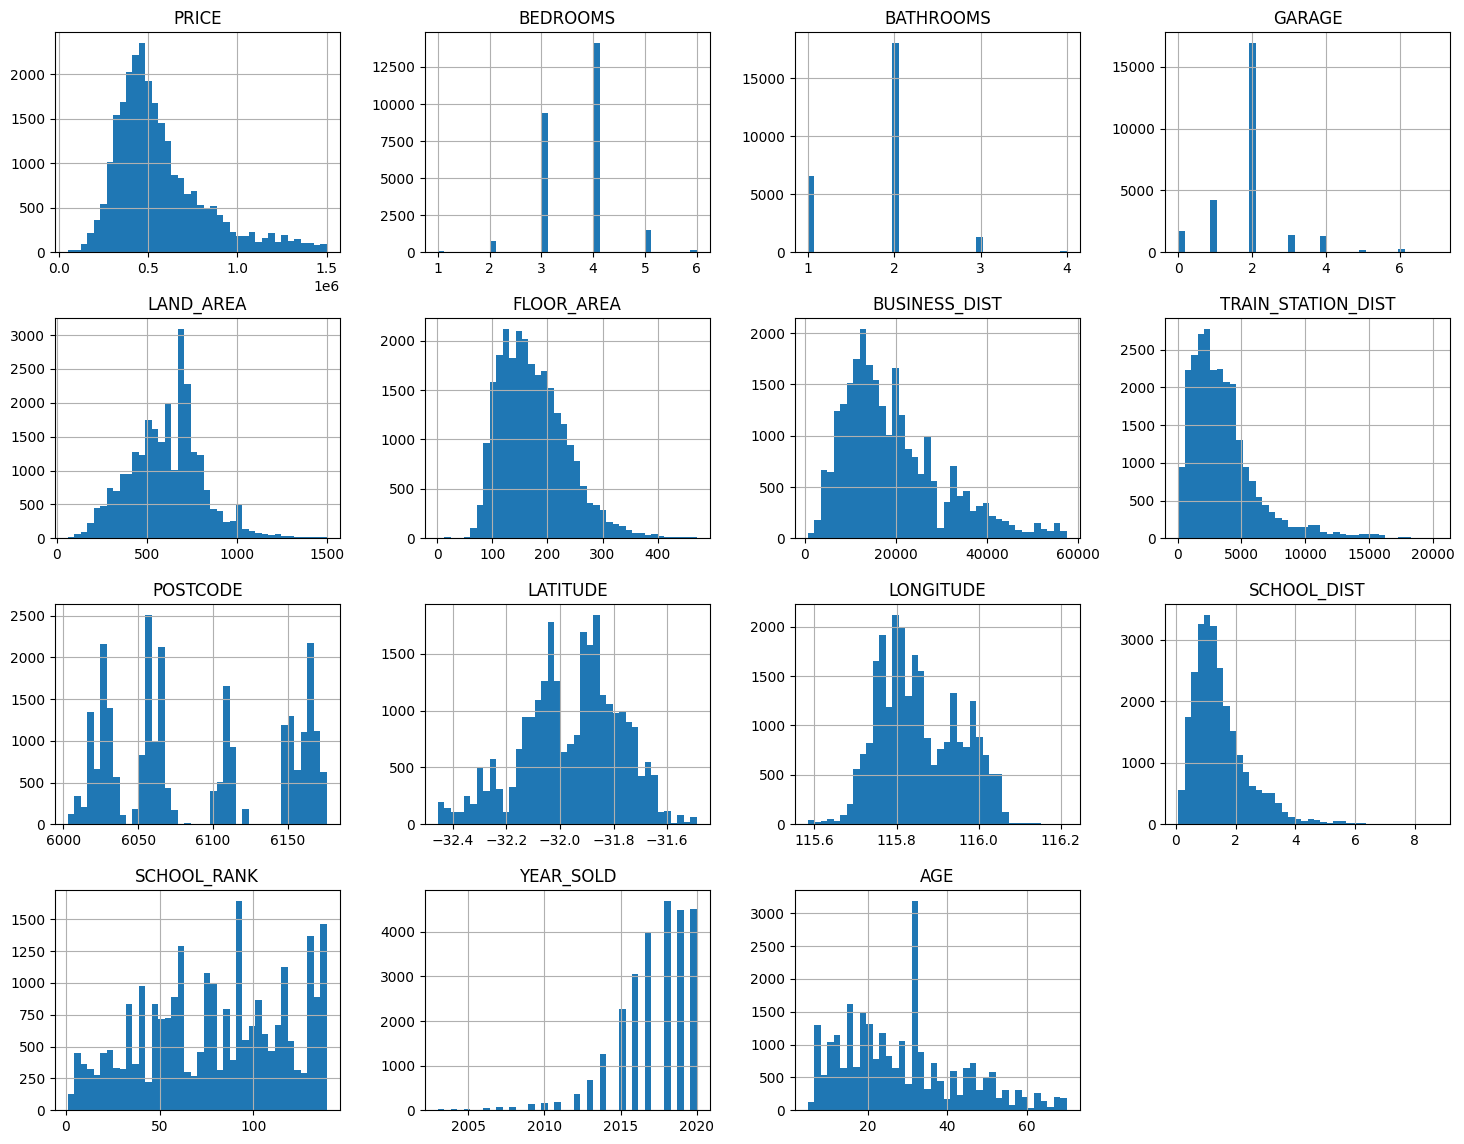

In [2313]:
data.hist(bins=40, figsize=(18,14))

## Models building and choosing the best model

In [2314]:
X = data.drop('PRICE', axis=1)
y = data['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [2315]:
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2316]:
models = {
    'XGBRegressor':XGBRegressor(),
    'Linear':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'DecisionTree':DecisionTreeRegressor(),
    'RandomForest':RandomForestRegressor()
}

In [2317]:
from sklearn.metrics import mean_absolute_error, r2_score

names = []
scores = []
absolute_errors = []

for name,model in models.items():
    model.fit(X_train,y_train)
    predicted = model.predict(X_test)

    names.append(name)
    scores.append(r2_score(y_test, predicted))
    absolute_errors.append(round(mean_absolute_error(y_test, predicted), 2))
    
    df_results = pd.DataFrame([names, scores, absolute_errors])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'Score',2:'Absolute error'}).sort_values(by='Score', ascending=False)
    
print(df_results)

          Model     Score Absolute error
5  RandomForest  0.858265       64672.91
0  XGBRegressor  0.857875       64902.03
4  DecisionTree  0.709774        93106.1
1        Linear  0.705083      101289.33
3         Lasso  0.705081      101288.85
2         Ridge  0.705005      101271.48


In [2318]:
test = pd.DataFrame(X_test.copy())
test['PREDICTED_PRICE'] = models['XGBRegressor'].predict(X_test)
test['PRICE'] = y_test
# calculate error in % of price
test['PERCENT_ERROR'] = np.abs((test['PREDICTED_PRICE']-test['PRICE']))/test['PRICE']*100
test = test[['PRICE', 'PREDICTED_PRICE', 'PERCENT_ERROR']]

In [2319]:
test.head()

,PRICE,PREDICTED_PRICE,PERCENT_ERROR
12679,470000,460031.09375,2.121044
27262,555000,505979.28125,8.832562
23681,532000,545684.56250,2.572286
6792,405000,394907.31250,2.492022
31666,630000,734207.43750,16.540863


In [2320]:
test['PERCENT_ERROR'].mean()

12.969641803878718